In [1]:
import pandas as pd
import numpy as np

In [2]:
# !unzip -o /Users/priyanshu.tuli/Desktop/kaggle/Datasets/flight-delays-fall-2018/flight_delays_test.csv.zip -d /Users/priyanshu.tuli/Desktop/kaggle/Datasets/flight-delays-fall-2018

In [3]:
# !unzip -o /Users/priyanshu.tuli/Desktop/kaggle/Datasets/flight-delays-fall-2018/flight_delays_train.csv.zip -d /Users/priyanshu.tuli/Desktop/kaggle/Datasets/flight-delays-fall-2018

In [4]:
# !unzip -o /Users/priyanshu.tuli/Desktop/kaggle/Datasets/flight-delays-fall-2018/sample_submission.csv.zip -d /Users/priyanshu.tuli/Desktop/kaggle/Datasets/flight-delays-fall-2018

In [5]:
train_df = pd.read_csv("/Users/priyanshu.tuli/Desktop/kaggle/Datasets/flight-delays-fall-2018/flight_delays_train.csv")

In [6]:
test_df = pd.read_csv("/Users/priyanshu.tuli/Desktop/kaggle/Datasets/flight-delays-fall-2018/flight_delays_test.csv")

In [7]:
train_df.shape, test_df.shape

((100000, 9), (100000, 8))

In [8]:
set(train_df.columns) - set(test_df.columns)

{'dep_delayed_15min'}

In [9]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Month          100000 non-null  object
 1   DayofMonth     100000 non-null  object
 2   DayOfWeek      100000 non-null  object
 3   DepTime        100000 non-null  int64 
 4   UniqueCarrier  100000 non-null  object
 5   Origin         100000 non-null  object
 6   Dest           100000 non-null  object
 7   Distance       100000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


In [12]:
train_df['dep_delayed_15min'].value_counts(normalize=True)

dep_delayed_15min
N    0.80956
Y    0.19044
Name: proportion, dtype: float64

In [13]:
train_df['dep_delayed_15min'] = train_df['dep_delayed_15min'].map({'Y': 1, 'N': 0})

In [14]:
train_df['Month'].value_counts(normalize=True) * 100

Month
c-8     8.830
c-7     8.706
c-3     8.595
c-5     8.543
c-6     8.414
c-4     8.408
c-10    8.405
c-12    8.265
c-11    8.178
c-9     8.163
c-1     8.075
c-2     7.418
Name: proportion, dtype: float64

In [15]:
train_df["Month"] = train_df["Month"].str.split('-').str[1].astype(int)

In [16]:
test_df["Month"] = test_df["Month"].str.split('-').str[1].astype(int)

In [17]:
train_df['Month'].value_counts(normalize=True) * 100

Month
8     8.830
7     8.706
3     8.595
5     8.543
6     8.414
4     8.408
10    8.405
12    8.265
11    8.178
9     8.163
1     8.075
2     7.418
Name: proportion, dtype: float64

In [18]:
train_df['DayofMonth'].value_counts(normalize=True) * 100

DayofMonth
c-1     3.399
c-20    3.380
c-6     3.377
c-22    3.374
c-14    3.366
c-17    3.347
c-10    3.342
c-27    3.330
c-28    3.321
c-5     3.321
c-23    3.314
c-25    3.314
c-21    3.312
c-19    3.305
c-15    3.297
c-2     3.285
c-9     3.283
c-7     3.272
c-8     3.258
c-4     3.249
c-18    3.246
c-26    3.241
c-16    3.240
c-13    3.238
c-3     3.228
c-12    3.212
c-24    3.210
c-11    3.168
c-30    2.976
c-29    2.837
c-31    1.958
Name: proportion, dtype: float64

In [19]:
train_df["DayofMonth"] = train_df["DayofMonth"].str.split('-').str[1].astype(int)
test_df["DayofMonth"] = test_df["DayofMonth"].str.split('-').str[1].astype(int)

In [20]:
train_df["DayofMonth"].nunique(), test_df["DayofMonth"].nunique()

(31, 31)

In [21]:
train_df['Month'].nunique(), test_df['Month'].nunique()

(12, 12)

In [22]:
train_df['DayOfWeek'].value_counts(normalize=True) * 100

DayOfWeek
c-4    14.736
c-5    14.657
c-2    14.604
c-1    14.569
c-3    14.508
c-7    14.097
c-6    12.829
Name: proportion, dtype: float64

In [23]:
train_df['DayOfWeek'] = train_df['DayOfWeek'].str.split('-').str[1].astype(int)
test_df['DayOfWeek'] = test_df['DayOfWeek'].str.split('-').str[1].astype(int)

In [24]:
train_df['DayOfWeek'].nunique(), test_df['DayOfWeek'].nunique()

(7, 7)

In [25]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1


In [26]:
train_df["UniqueCarrier"].nunique(), test_df["UniqueCarrier"].nunique()

(22, 20)

In [27]:
train_df["UniqueCarrier"].value_counts(normalize=True) * 100

UniqueCarrier
WN    15.082
AA     9.418
DL     8.128
MQ     7.443
OO     7.390
UA     6.876
US     6.482
NW     6.403
XE     5.901
OH     4.594
CO     4.334
EV     3.930
FL     3.039
AS     2.222
YV     2.128
B6     1.838
HP     1.378
F9     1.006
DH     0.966
HA     0.762
TZ     0.446
AQ     0.234
Name: proportion, dtype: float64

In [28]:
train_df["Origin"].nunique(), test_df["Origin"].nunique()

(289, 300)

In [29]:
train_df["Origin"].value_counts(normalize=True) * 100

Origin
ATL    5.834
ORD    4.870
DFW    4.270
LAX    3.259
IAH    3.048
       ...  
VIS    0.001
WYS    0.001
ILG    0.001
VCT    0.001
ADK    0.001
Name: proportion, Length: 289, dtype: float64

In [30]:
train_df["Dest"].nunique(), test_df["Dest"].nunique()

(289, 298)

In [31]:
common_dest = set(train_df["Dest"].unique()) & set(test_df["Dest"].unique())

In [32]:
len(common_dest)

280

In [33]:
common_origin = set(train_df["Origin"].unique()) & set(test_df["Origin"].unique())

In [34]:
len(common_origin)

282

In [35]:
high_freq_carriers = train_df["UniqueCarrier"].value_counts(normalize=True) * 100 > 5

In [36]:
high_freq_carriers = high_freq_carriers[high_freq_carriers == True].index

In [37]:
train_df['Carrier_Binned'] = np.where(train_df['UniqueCarrier'].isin(high_freq_carriers), train_df['UniqueCarrier'], 'Other')

In [38]:
test_df['Carrier_Binned'] = np.where(test_df['UniqueCarrier'].isin(high_freq_carriers), test_df['UniqueCarrier'], 'Other')

In [39]:
train_df['Carrier_Binned'].nunique(), test_df['Carrier_Binned'].nunique()

(10, 10)

In [40]:
train_df['Distance'].describe()

count    100000.00000
mean        729.39716
std         574.61686
min          30.00000
25%         317.00000
50%         575.00000
75%         957.00000
max        4962.00000
Name: Distance, dtype: float64

In [41]:
test_df['Distance'].describe()

count    100000.00000
mean        723.13011
std         563.22322
min          31.00000
25%         321.00000
50%         574.00000
75%         948.00000
max        4962.00000
Name: Distance, dtype: float64

In [42]:
import matplotlib.pyplot as plt

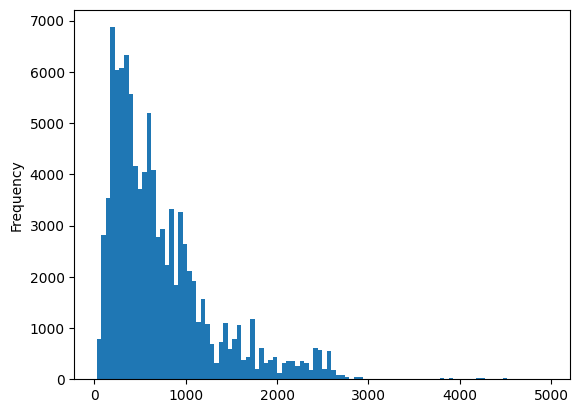

In [43]:
train_df['Distance'].plot(kind='hist', bins=100)
plt.show()

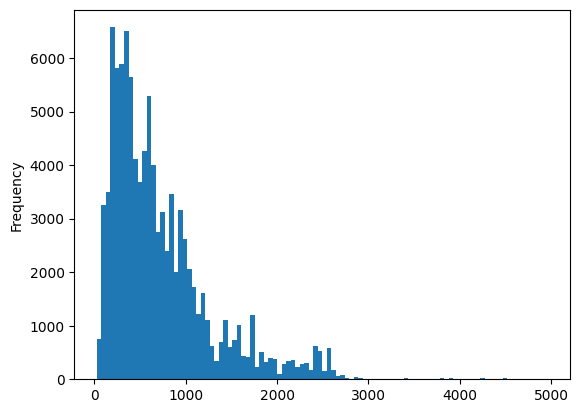

In [44]:
test_df['Distance'].plot(kind='hist', bins=100)
plt.show()

In [45]:
train_df['UniqueCarrier_Delayed'] = train_df.groupby('UniqueCarrier')['dep_delayed_15min'].transform(lambda x: x.mode()[0])

In [46]:
for i, group in test_df.groupby('UniqueCarrier'):
    train_group = train_df[train_df['UniqueCarrier'] == i]
    if not train_group.empty:
        test_df.loc[test_df['UniqueCarrier'] == i, 'UniqueCarrier_Delayed'] = train_group['dep_delayed_15min'].mode()[0]
    else:
        test_df.loc[test_df['UniqueCarrier'] == i, 'UniqueCarrier_Delayed'] = train_df['dep_delayed_15min'].mode()[0]

In [47]:
test_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Carrier_Binned,UniqueCarrier_Delayed
0,7,25,3,615,YV,MRY,PHX,598,Other,0.0
1,4,17,2,739,WN,LAS,HOU,1235,WN,0.0
2,12,2,7,651,MQ,GSP,ORD,577,MQ,0.0
3,3,25,7,1614,WN,BWI,MHT,377,WN,0.0
4,6,6,3,1505,UA,ORD,STL,258,UA,0.0


In [48]:
train_df["Carrier_Origin_Dest_Delayed"] = train_df.groupby(['UniqueCarrier', 'Origin', 'Dest'])['dep_delayed_15min'].transform(lambda x: x.mode()[0])

In [49]:
from tqdm import tqdm
tqdm.pandas()

In [50]:
for i, group in tqdm(test_df.groupby(["UniqueCarrier", "Origin", "Dest"])):
    train_group = train_df[(train_df["UniqueCarrier"] == i[0]) & (train_df["Origin"] == i[1]) & (train_df["Dest"] == i[2])]
    if not train_group.empty:
        test_df.loc[(test_df["UniqueCarrier"] == i[0]) & (test_df["Origin"] == i[1]) & (test_df["Dest"] == i[2]), "Carrier_Origin_Dest_Delayed"] = train_group["dep_delayed_15min"].mode()[0]
    else:
        test_df.loc[(test_df["UniqueCarrier"] == i[0]) & (test_df["Origin"] == i[1]) & (test_df["Dest"] == i[2]), "Carrier_Origin_Dest_Delayed"] = train_df["dep_delayed_15min"].mode()[0]

100%|██████████| 7168/7168 [02:51<00:00, 41.79it/s]


In [51]:
train_df["Carrier_Origin_Dest_Delayed"].value_counts(normalize=True) * 100

Carrier_Origin_Dest_Delayed
0    98.775
1     1.225
Name: proportion, dtype: float64

In [52]:
test_df["Carrier_Origin_Dest_Delayed"].value_counts(normalize=True) * 100

Carrier_Origin_Dest_Delayed
0.0    98.347
1.0     1.653
Name: proportion, dtype: float64

In [53]:
train_df['Origin_Dest_Delayed'] = train_df.groupby(['Origin', 'Dest'])['dep_delayed_15min'].transform(lambda x: x.mode()[0])

In [54]:
for i, group in tqdm(test_df.groupby(["Origin", "Dest"])):
    train_group = train_df[(train_df["Origin"] == i[0]) & (train_df["Dest"] == i[1])]
    if not train_group.empty:
        test_df.loc[(test_df["Origin"] == i[0]) & (test_df["Dest"] == i[1]), "Origin_Dest_Delayed"] = train_group["dep_delayed_15min"].mode()[0]
    else:
        test_df.loc[(test_df["Origin"] == i[0]) & (test_df["Dest"] == i[1]), "Origin_Dest_Delayed"] = train_df["dep_delayed_15min"].mode()[0]

100%|██████████| 4669/4669 [01:13<00:00, 63.20it/s]


In [55]:
train_df["Origin_Dest_Delayed"].value_counts(normalize=True) * 100

Origin_Dest_Delayed
0    99.438
1     0.562
Name: proportion, dtype: float64

In [56]:
test_df["Origin_Dest_Delayed"].value_counts(normalize=True) * 100

Origin_Dest_Delayed
0.0    99.189
1.0     0.811
Name: proportion, dtype: float64

In [57]:
train_df['Distance_Binned'], dist_bin_edges = pd.qcut(train_df['Distance'], q=10, labels=False, retbins=True)

In [58]:
train_df['Distance_Binned'].value_counts(normalize=True) * 100

Distance_Binned
0    10.221
6    10.082
2    10.026
3    10.011
5     9.986
7     9.985
9     9.963
8     9.962
4     9.954
1     9.810
Name: proportion, dtype: float64

In [59]:
dist_bin_edges

array([  30.,  200.,  276.,  356.,  446.,  575.,  682.,  866., 1055.,
       1545., 4962.])

In [60]:
test_df['Distance_Binned'] = pd.cut(test_df['Distance'], bins=dist_bin_edges, labels=False, include_lowest=True)

In [61]:
train_df["Distance_Binned"].nunique(), test_df["Distance_Binned"].nunique()

(10, 10)

In [62]:
train_df["Distance_Binned"].value_counts(normalize=True) * 100

Distance_Binned
0    10.221
6    10.082
2    10.026
3    10.011
5     9.986
7     9.985
9     9.963
8     9.962
4     9.954
1     9.810
Name: proportion, dtype: float64

In [63]:
test_df["Distance_Binned"].value_counts(normalize=True) * 100

Distance_Binned
6    10.522
4    10.375
0    10.359
5     9.989
8     9.951
7     9.946
3     9.941
2     9.905
9     9.538
1     9.474
Name: proportion, dtype: float64

In [64]:
train_df["Distance_Delayed"] = train_df.groupby("Distance_Binned")["dep_delayed_15min"].transform(lambda x: x.mode()[0])

In [65]:
for i, group in test_df.groupby("Distance_Binned"):
    train_group = train_df[train_df["Distance_Binned"] == i]
    if not train_group.empty:
        test_df.loc[test_df["Distance_Binned"] == i, "Distance_Delayed"] = train_group["dep_delayed_15min"].mode()[0]
    else:
        test_df.loc[test_df["Distance_Binned"] == i, "Distance_Delayed"] = train_df["dep_delayed_15min"].mode()[0]

In [66]:
train_df["Distance_Delayed"].value_counts(normalize=True) * 100

Distance_Delayed
0    100.0
Name: proportion, dtype: float64

In [67]:
train_df["Distance_Delayed"].value_counts(normalize=True) * 100

Distance_Delayed
0    100.0
Name: proportion, dtype: float64

In [68]:
train_df['Dest_Delayed'] = train_df.groupby('Dest')['dep_delayed_15min'].transform(lambda x: x.mode()[0])

In [69]:
test_df['Dest_Delayed'] = test_df['Dest'].map(train_df.groupby('Dest')['dep_delayed_15min'].apply(lambda x: x.mode()[0]))

In [70]:
train_df['Origin_Delayed'] = train_df.groupby('Origin')['dep_delayed_15min'].transform(lambda x: x.mode()[0])

In [71]:
test_df['Origin_Delayed'] = test_df['Origin'].map(train_df.groupby('Origin')['dep_delayed_15min'].apply(lambda x: x.mode()[0]))

In [72]:
train_df['Origin_Delayed'].value_counts(normalize=True) * 100

Origin_Delayed
0    99.968
1     0.032
Name: proportion, dtype: float64

In [73]:
train_df['Dest_Delayed'].value_counts(normalize=True) * 100

Dest_Delayed
0    99.993
1     0.007
Name: proportion, dtype: float64

In [74]:
test_df['Origin_Delayed'].value_counts(normalize=True) * 100

Origin_Delayed
0.0    99.951952
1.0     0.048048
Name: proportion, dtype: float64

In [75]:
test_df['Dest_Delayed'].value_counts(normalize=True) * 100

Dest_Delayed
0.0    99.972974
1.0     0.027026
Name: proportion, dtype: float64

In [76]:
import seaborn as sns

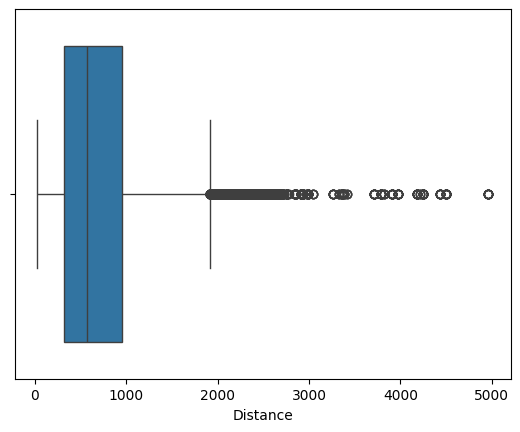

In [77]:
sns.boxplot(x='Distance', data=train_df)
plt.show()

In [78]:
train_df['is_distance_outlier'] = train_df['Distance'] >= 2000

In [79]:
train_df['is_distance_outlier'].value_counts(normalize=True) * 100

is_distance_outlier
False    95.191
True      4.809
Name: proportion, dtype: float64

In [80]:
test_df['is_distance_outlier'] = test_df['Distance'] >= 2000

In [81]:
test_df['is_distance_outlier'].value_counts(normalize=True) * 100

is_distance_outlier
False    95.489
True      4.511
Name: proportion, dtype: float64

In [82]:
train_df['is_distance_outlier'] = train_df['is_distance_outlier'].astype(int)
test_df['is_distance_outlier'] = test_df['is_distance_outlier'].astype(int)

In [83]:
train_df['is_distance_outlier_delayed'] = train_df.groupby('is_distance_outlier')['dep_delayed_15min'].transform(lambda x: x.mode()[0])

In [84]:
test_df['is_distance_outlier_delayed'] = test_df['is_distance_outlier'].map(train_df.groupby('is_distance_outlier')['dep_delayed_15min'].apply(lambda x: x.mode()[0]))

In [85]:
train_df['is_distance_outlier_delayed'].value_counts(normalize=True) * 100

is_distance_outlier_delayed
0    100.0
Name: proportion, dtype: float64

In [86]:
test_df['is_distance_outlier_delayed'].value_counts(normalize=True) * 100

is_distance_outlier_delayed
0    100.0
Name: proportion, dtype: float64

In [87]:
train_df.drop(columns=['is_distance_outlier_delayed', 'Distance_Delayed'], inplace=True)
test_df.drop(columns=['is_distance_outlier_delayed', 'Distance_Delayed'], inplace=True)

In [88]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,Carrier_Binned,UniqueCarrier_Delayed,Carrier_Origin_Dest_Delayed,Origin_Dest_Delayed,Distance_Binned,Dest_Delayed,Origin_Delayed,is_distance_outlier
0,8,21,7,1934,AA,ATL,DFW,732,0,AA,0,0,0,6,0,0,0
1,4,20,3,1548,US,PIT,MCO,834,0,US,0,0,0,6,0,0,0
2,9,2,5,1422,XE,RDU,CLE,416,0,XE,0,0,0,3,0,0,0
3,11,25,6,1015,OO,DEN,MEM,872,0,OO,0,0,0,7,0,0,0
4,10,7,6,1828,WN,MDW,OMA,423,1,WN,0,0,0,3,0,0,0


In [89]:
train_df['DepTime'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    100000.000000
mean       1341.523880
std         476.378445
min           1.000000
25%         931.000000
50%        1330.000000
75%        1733.000000
90%        2007.000000
95%        2115.000000
99%        2252.000000
max        2534.000000
Name: DepTime, dtype: float64

<Axes: ylabel='Frequency'>

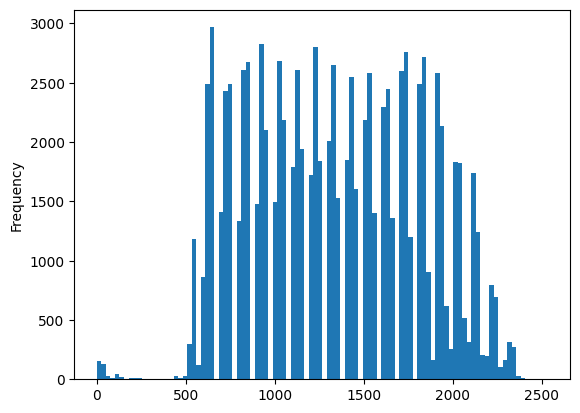

In [90]:
train_df['DepTime'].plot(kind='hist', bins=100)

In [91]:
train_df["DepTime_Binned"], dep_time_bin_edges = pd.qcut(train_df["DepTime"], q=10, labels=False, retbins=True)

In [92]:
train_df["DepTime_Binned"].value_counts(normalize=True) * 100

DepTime_Binned
4    10.124
0    10.060
7    10.038
3    10.010
8    10.004
1     9.999
2     9.986
6     9.941
9     9.932
5     9.906
Name: proportion, dtype: float64

In [93]:
test_df["DepTime_Binned"] = pd.cut(test_df["DepTime"], bins=dep_time_bin_edges, labels=False, include_lowest=True)

In [94]:
test_df["DepTime_Binned"].value_counts(normalize=True) * 100

DepTime_Binned
0    10.579
5    10.097
8    10.091
9    10.051
1    10.005
2     9.947
3     9.882
4     9.833
7     9.781
6     9.734
Name: proportion, dtype: float64

In [95]:
train_df['is_dep_time_outlier'] = train_df['DepTime'] >= 2460
test_df['is_dep_time_outlier'] = test_df['DepTime'] >= 2460

In [96]:
train_df['is_dep_time_outlier'] = train_df['is_dep_time_outlier'].astype(int)
test_df['is_dep_time_outlier'] = test_df['is_dep_time_outlier'].astype(int)

In [97]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,Carrier_Binned,UniqueCarrier_Delayed,Carrier_Origin_Dest_Delayed,Origin_Dest_Delayed,Distance_Binned,Dest_Delayed,Origin_Delayed,is_distance_outlier,DepTime_Binned,is_dep_time_outlier
0,8,21,7,1934,AA,ATL,DFW,732,0,AA,0,0,0,6,0,0,0,8,0
1,4,20,3,1548,US,PIT,MCO,834,0,US,0,0,0,6,0,0,0,6,0
2,9,2,5,1422,XE,RDU,CLE,416,0,XE,0,0,0,3,0,0,0,5,0
3,11,25,6,1015,OO,DEN,MEM,872,0,OO,0,0,0,7,0,0,0,2,0
4,10,7,6,1828,WN,MDW,OMA,423,1,WN,0,0,0,3,0,0,0,8,0


In [98]:
train_df['sin_month'] = np.sin(2 * np.pi * train_df['Month'] / 12)
train_df['cos_month'] = np.cos(2 * np.pi * train_df['Month'] / 12)

In [99]:
test_df['sin_month'] = np.sin(2 * np.pi * test_df['Month'] / 12)
test_df['cos_month'] = np.cos(2 * np.pi * test_df['Month'] / 12)

In [100]:
train_df['sin_dayofmonth'] = np.sin(2 * np.pi * train_df['DayofMonth'] / 31)
train_df['cos_dayofmonth'] = np.cos(2 * np.pi * train_df['DayofMonth'] / 31)

In [101]:
test_df['sin_dayofmonth'] = np.sin(2 * np.pi * test_df['DayofMonth'] / 31)
test_df['cos_dayofmonth'] = np.cos(2 * np.pi * test_df['DayofMonth'] / 31)

In [102]:
train_df['sin_dayofweek'] = np.sin(2 * np.pi * train_df['DayOfWeek'] / 7)
train_df['cos_dayofweek'] = np.cos(2 * np.pi * train_df['DayOfWeek'] / 7)

In [103]:
test_df['sin_dayofweek'] = np.sin(2 * np.pi * test_df['DayOfWeek'] / 7)
test_df['cos_dayofweek'] = np.cos(2 * np.pi * test_df['DayOfWeek'] / 7)

In [104]:
train_df['number_of_flights_in_month'] = train_df.groupby('Month')['UniqueCarrier'].transform('count')

In [105]:
test_df['number_of_flights_in_month'] = test_df['Month'].map(train_df.groupby('Month')['UniqueCarrier'].count())

In [106]:
train_df['number_of_flights_in_month'].describe()

count    100000.000000
mean       8348.109220
std         342.068572
min        7418.000000
25%        8178.000000
50%        8408.000000
75%        8595.000000
max        8830.000000
Name: number_of_flights_in_month, dtype: float64

In [107]:
test_df['number_of_flights_in_month'].describe()

count    100000.000000
mean       8348.341990
std         342.228438
min        7418.000000
25%        8178.000000
50%        8408.000000
75%        8595.000000
max        8830.000000
Name: number_of_flights_in_month, dtype: float64

In [108]:
train_df['week_of_month'] = train_df['DayofMonth'] // 7
test_df['week_of_month'] = test_df['DayofMonth'] // 7

In [109]:
train_df['number_of_flights_in_a_week'] = train_df.groupby(['Month', 'week_of_month'])['UniqueCarrier'].transform('count')
test_df['number_of_flights_in_a_week'] = test_df.groupby(['Month', 'week_of_month'])['UniqueCarrier'].transform('count')

In [110]:
train_df['UniqueCarrier_Cat'] = train_df['UniqueCarrier'].astype('category').cat.codes
test_df['UniqueCarrier_Cat'] = test_df['UniqueCarrier'].map(train_df.groupby('UniqueCarrier')['UniqueCarrier_Cat'].mean())

In [111]:
train_df['Origin_Cat'] = train_df['Origin'].astype('category').cat.codes
test_df['Origin_Cat'] = test_df['Origin'].map(train_df.groupby('Origin')['Origin_Cat'].mean())

In [112]:
train_df['Dest_Cat'] = train_df['Dest'].astype('category').cat.codes
test_df['Dest_Cat'] = test_df['Dest'].map(train_df.groupby('Dest')['Dest_Cat'].mean())

In [113]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,Carrier_Binned,...,sin_dayofmonth,cos_dayofmonth,sin_dayofweek,cos_dayofweek,number_of_flights_in_month,week_of_month,number_of_flights_in_a_week,UniqueCarrier_Cat,Origin_Cat,Dest_Cat
0,8,21,7,1934,AA,ATL,DFW,732,0,AA,...,-0.897805,-0.440394,-2.449294e-16,1.000000,8830,3,2085,0,18,78
1,4,20,3,1548,US,PIT,MCO,834,0,US,...,-0.790776,-0.612106,4.338837e-01,-0.900969,8408,2,2004,18,217,171
2,9,2,5,1422,XE,RDU,CLE,416,0,XE,...,0.394356,0.918958,-9.749279e-01,-0.222521,8163,0,1639,20,228,59
3,11,25,6,1015,OO,DEN,MEM,872,0,OO,...,-0.937752,0.347305,-7.818315e-01,0.623490,8178,3,1852,15,78,175
4,10,7,6,1828,WN,MDW,OMA,423,1,WN,...,0.988468,0.151428,-7.818315e-01,0.623490,8405,1,1862,19,174,199


In [114]:
train_df['sin_week_of_month'] = np.sin(2 * np.pi * train_df['week_of_month'] / 4)
train_df['cos_week_of_month'] = np.cos(2 * np.pi * train_df['week_of_month'] / 4)

In [115]:
test_df['sin_week_of_month'] = np.sin(2 * np.pi * test_df['week_of_month'] / 4)
test_df['cos_week_of_month'] = np.cos(2 * np.pi * test_df['week_of_month'] / 4)

In [116]:
from sklearn.cluster import KMeans

In [117]:
kmeans = KMeans(n_clusters=10, random_state=42)

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
kmeans.fit(StandardScaler().fit_transform(train_df[['Distance', 'DepTime']]))

KMeans(n_clusters=10, random_state=42)

In [120]:
scaler = StandardScaler()

In [121]:
scaler.fit(train_df[['Distance', 'DepTime']])

StandardScaler()

In [122]:
train_df['Distance_DepTime_Cluster'] = kmeans.predict(scaler.transform(train_df[['Distance', 'DepTime']]))

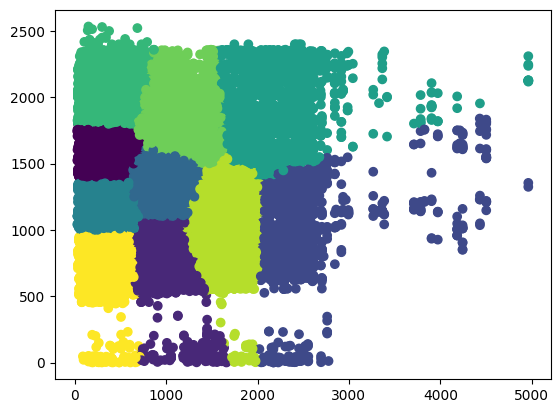

In [123]:
plt.scatter(train_df['Distance'], train_df['DepTime'], c=train_df['Distance_DepTime_Cluster'], cmap='viridis')
plt.show()

In [124]:
test_df['Distance_DepTime_Cluster'] = kmeans.predict(scaler.transform(test_df[['Distance', 'DepTime']]))

In [125]:
train_df['Distance_DepTime_Cluster'].value_counts(normalize=True) * 100

Distance_DepTime_Cluster
9    15.498
0    15.308
6    14.553
4    14.106
1     9.801
3     9.786
7     9.248
8     5.515
5     3.462
2     2.723
Name: proportion, dtype: float64

In [126]:
train_df['Distance_DepTime_Cluster'].value_counts(normalize=True) * 100

Distance_DepTime_Cluster
9    15.498
0    15.308
6    14.553
4    14.106
1     9.801
3     9.786
7     9.248
8     5.515
5     3.462
2     2.723
Name: proportion, dtype: float64

In [127]:
train_df['Distance_DepTime_Cluster_Delayed'] = train_df.groupby('Distance_DepTime_Cluster')['dep_delayed_15min'].transform(lambda x: x.mode()[0])
test_df['Distance_DepTime_Cluster_Delayed'] = test_df['Distance_DepTime_Cluster'].map(train_df.groupby('Distance_DepTime_Cluster')['dep_delayed_15min'].apply(lambda x: x.mode()[0]))

In [128]:
train_df['Distance_DepTime_Cluster_Delayed'].value_counts(normalize=True) * 100

Distance_DepTime_Cluster_Delayed
0    100.0
Name: proportion, dtype: float64

In [129]:
test_df['Distance_DepTime_Cluster_Delayed'].value_counts(normalize=True) * 100

Distance_DepTime_Cluster_Delayed
0    100.0
Name: proportion, dtype: float64

In [130]:
train_df.drop(columns=['Distance_DepTime_Cluster_Delayed'], inplace=True)
test_df.drop(columns=['Distance_DepTime_Cluster_Delayed'], inplace=True)

In [131]:
train_df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'Origin', 'Dest', 'Distance', 'dep_delayed_15min', 'Carrier_Binned',
       'UniqueCarrier_Delayed', 'Carrier_Origin_Dest_Delayed',
       'Origin_Dest_Delayed', 'Distance_Binned', 'Dest_Delayed',
       'Origin_Delayed', 'is_distance_outlier', 'DepTime_Binned',
       'is_dep_time_outlier', 'sin_month', 'cos_month', 'sin_dayofmonth',
       'cos_dayofmonth', 'sin_dayofweek', 'cos_dayofweek',
       'number_of_flights_in_month', 'week_of_month',
       'number_of_flights_in_a_week', 'UniqueCarrier_Cat', 'Origin_Cat',
       'Dest_Cat', 'sin_week_of_month', 'cos_week_of_month',
       'Distance_DepTime_Cluster'],
      dtype='object')

In [132]:
train_df['number_of_flights_in_a_day'] = train_df.groupby(['Month', 'DayofMonth'])['UniqueCarrier'].transform('count')
test_df['number_of_flights_in_a_day'] = test_df.groupby(['Month', 'DayofMonth'])['UniqueCarrier'].transform('count')

In [133]:
train_df.drop(columns=['UniqueCarrier', 'Origin', 'Dest', 'Month', 'DayofMonth', "DayOfWeek", "week_of_month"], inplace=True)
test_df.drop(columns=['UniqueCarrier', 'Origin', 'Dest', 'Month', 'DayofMonth', "DayOfWeek", "week_of_month"], inplace=True)

In [134]:
train_df['Carrier_Binned_Cat'] = train_df['Carrier_Binned'].astype('category').cat.codes
test_df['Carrier_Binned_Cat'] = test_df['Carrier_Binned'].map(train_df.groupby('Carrier_Binned')['Carrier_Binned_Cat'].mean())

In [135]:
train_df.drop(columns=['Carrier_Binned'], inplace=True)
test_df.drop(columns=['Carrier_Binned'], inplace=True)

In [136]:
bool_cols = train_df.select_dtypes(include='bool').columns

In [137]:
bool_cols

Index([], dtype='object')

In [138]:
cat_cols = ['Carrier_Binned_Cat', 'UniqueCarrier_Cat', 'Origin_Cat', 'Dest_Cat']

In [139]:
for col in cat_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
train, valid = train_test_split(train_df, test_size=0.2, random_state=42)

In [142]:
train.shape, valid.shape

((80000, 28), (20000, 28))

In [143]:
import lightgbm as lgb

In [221]:
lgb_params = {
    'objective': 'binary',
    'metric': 'auc',
    'n_estimators': 2000,
    'learning_rate': 0.05,
    'num_leaves': 50,
    'max_depth': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.6,
    'random_state': 42,
    'n_jobs': -1,
    'class_weight': 'balanced',
    'reg_alpha': 0.5,
    'reg_lambda': 0.5
}

In [222]:
lgb_train = lgb.Dataset(train.drop(columns=['dep_delayed_15min']), label=train['dep_delayed_15min'])

In [223]:
lgb_valid = lgb.Dataset(valid.drop(columns=['dep_delayed_15min']), label=valid['dep_delayed_15min'], reference=lgb_train)

In [224]:
lgb_model = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train, lgb_valid])

/Users/priyanshu.tuli/Desktop/kaggle/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 15266, number of negative: 64734
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1352
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 24
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.190825 -> initscore=-1.444658
[LightGBM] [Info] Start training from score -1.444658


In [225]:
from sklearn.metrics import roc_auc_score

In [226]:
valid_preds = lgb_model.predict(valid.drop(columns=['dep_delayed_15min']))

In [227]:
valid_preds = (valid_preds >= 0.5).astype(int)

In [228]:
train_preds = lgb_model.predict(train.drop(columns=['dep_delayed_15min']))

In [229]:
train_preds = (train_preds >= 0.5).astype(int)

In [230]:
train_roc_auc = roc_auc_score(train['dep_delayed_15min'], train_preds)

In [231]:
valid_roc_auc = roc_auc_score(valid['dep_delayed_15min'], valid_preds)

In [232]:
train_roc_auc, valid_roc_auc

(np.float64(0.8631754890669883), np.float64(0.5970602830146748))

<Figure size 1000x1000 with 0 Axes>

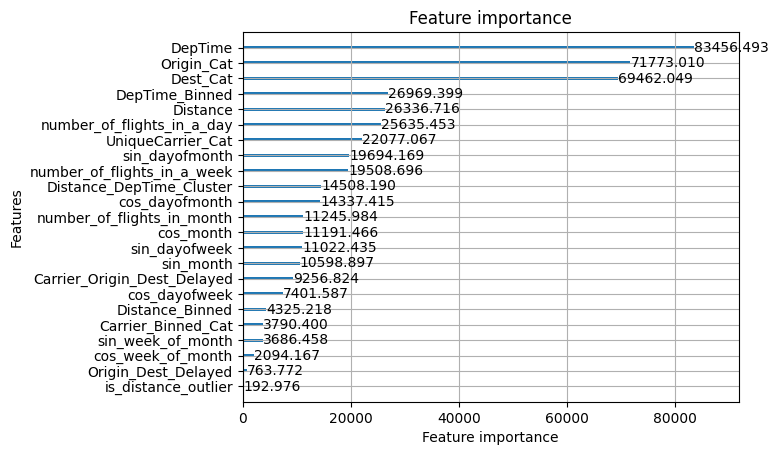

In [233]:
plt.figure(figsize=(10, 10))
lgb.plot_importance(lgb_model, importance_type='gain', max_num_features=30)
plt.show()

In [234]:
feature_importance = lgb_model.feature_importance(importance_type='gain')
feature_importance = pd.DataFrame({'feature': lgb_model.feature_name(), 'importance': feature_importance}).sort_values(by='importance', ascending=False)

In [235]:
feature_importance['normalized_importance'] = feature_importance['importance'] / feature_importance['importance'].sum()

In [236]:
feature_importance['cumulative_importance'] = feature_importance['normalized_importance'].cumsum()

In [237]:
feature_importance.loc[feature_importance['cumulative_importance'] <= 0.95, 'feature']

0                         DepTime
20                     Origin_Cat
21                       Dest_Cat
9                  DepTime_Binned
1                        Distance
25     number_of_flights_in_a_day
19              UniqueCarrier_Cat
13                 sin_dayofmonth
18    number_of_flights_in_a_week
24       Distance_DepTime_Cluster
14                 cos_dayofmonth
17     number_of_flights_in_month
12                      cos_month
15                  sin_dayofweek
11                      sin_month
Name: feature, dtype: object

In [238]:
top_features = feature_importance.loc[feature_importance['cumulative_importance'] <= 0.95, 'feature']

In [239]:
top_features_cat_cols = top_features[top_features.isin(cat_cols)]

In [240]:
top_features_cat_cols

20           Origin_Cat
21             Dest_Cat
19    UniqueCarrier_Cat
Name: feature, dtype: object

In [241]:
top_features

0                         DepTime
20                     Origin_Cat
21                       Dest_Cat
9                  DepTime_Binned
1                        Distance
25     number_of_flights_in_a_day
19              UniqueCarrier_Cat
13                 sin_dayofmonth
18    number_of_flights_in_a_week
24       Distance_DepTime_Cluster
14                 cos_dayofmonth
17     number_of_flights_in_month
12                      cos_month
15                  sin_dayofweek
11                      sin_month
Name: feature, dtype: object

In [242]:
lgb_train = lgb.Dataset(train.drop(columns=['dep_delayed_15min'])[top_features.values.tolist()], label=train['dep_delayed_15min'], categorical_feature=top_features_cat_cols.values.tolist())

In [244]:
lgb_params_full = {
    'objective': 'binary',
    'metric': 'auc',
    'n_estimators': 2000,
    'learning_rate': 0.05,
    'num_leaves': 100,
    'max_depth': 20,
    'subsample': 0.8,
    'colsample_bytree': 1,
    'random_state': 42,
    'n_jobs': -1,
    'class_weight': 'balanced',
    'alpha': 0.5,
    'lambda': 0.5
}

In [245]:
lgb_model_full = lgb.train(lgb_params_full, lgb_train)

/Users/priyanshu.tuli/Desktop/kaggle/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 15266, number of negative: 64734
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1306
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.190825 -> initscore=-1.444658
[LightGBM] [Info] Start training from score -1.444658


In [246]:
test_preds = lgb_model_full.predict(test_df[top_features])

In [247]:
test_preds

array([0.02114937, 0.02797911, 0.00363369, ..., 0.03930149, 0.02176521,
       0.15730304])

In [248]:
test_df['dep_delayed_15min'] = (test_preds >= 0.5).astype(int)

In [249]:
test_df.head()

,DepTime,Distance,UniqueCarrier_Delayed,Carrier_Origin_Dest_Delayed,Origin_Dest_Delayed,Distance_Binned,Dest_Delayed,Origin_Delayed,is_distance_outlier,DepTime_Binned,...,number_of_flights_in_a_week,UniqueCarrier_Cat,Origin_Cat,Dest_Cat,sin_week_of_month,cos_week_of_month,Distance_DepTime_Cluster,number_of_flights_in_a_day,Carrier_Binned_Cat,dep_delayed_15min
0,615,598,0.0,0.0,0.0,5,0.0,0.0,0,0,...,1997,21.0,190.0,211.0,-1.000000e+00,-1.836970e-16,9,297,5.0,0
1,739,1235,0.0,0.0,0.0,8,0.0,0.0,0,1,...,1934,19.0,151.0,124.0,1.224647e-16,-1.000000e+00,1,273,8.0,0
2,651,577,0.0,0.0,0.0,5,0.0,0.0,0,0,...,1623,12.0,116.0,202.0,0.000000e+00,1.000000e+00,9,251,2.0,0
3,1614,377,0.0,0.0,0.0,3,0.0,0.0,0,6,...,1920,19.0,47.0,179.0,-1.000000e+00,-1.836970e-16,0,278,8.0,0
4,1505,258,0.0,0.0,0.0,1,0.0,0.0,0,5,...,1659,17.0,204.0,260.0,0.000000e+00,1.000000e+00,0,293,6.0,0


In [250]:
test_df['id'] = test_df.index

In [251]:
submission = test_df[['id', 'dep_delayed_15min']]

In [252]:
submission.to_csv("submission.csv", index=False)